<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Réduction-de-dimensions-et-Visualisation-de-données" data-toc-modified-id="Réduction-de-dimensions-et-Visualisation-de-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Réduction de dimensions et Visualisation de données</a></span><ul class="toc-item"><li><span><a href="#Import-des-données" data-toc-modified-id="Import-des-données-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import des données</a></span></li><li><span><a href="#ACP" data-toc-modified-id="ACP-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>ACP</a></span></li><li><span><a href="#Fichier-Crime" data-toc-modified-id="Fichier-Crime-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Fichier Crime</a></span></li><li><span><a href="#Fichier-Startup" data-toc-modified-id="Fichier-Startup-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Fichier Startup</a></span></li></ul></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Clustering</a></span><ul class="toc-item"><li><span><a href="#KMeans" data-toc-modified-id="KMeans-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>KMeans</a></span></li><li><span><a href="#AgglomerativeClustering-:-méthode-ward" data-toc-modified-id="AgglomerativeClustering-:-méthode-ward-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>AgglomerativeClustering : méthode ward</a></span></li><li><span><a href="#AgglomerativeClustering-:-méthode-average" data-toc-modified-id="AgglomerativeClustering-:-méthode-average-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>AgglomerativeClustering : méthode average</a></span></li><li><span><a href="#Meilleure-partition-pour-KMeans" data-toc-modified-id="Meilleure-partition-pour-KMeans-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Meilleure partition pour KMeans</a></span></li><li><span><a href="#Meilleur-algorithme-pour-obtenir-3-clusters" data-toc-modified-id="Meilleur-algorithme-pour-obtenir-3-clusters-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Meilleur algorithme pour obtenir 3 clusters</a></span></li></ul></li></ul></div>

**Élèves** : 
- Gabin Rolland
- Amaury De Barbuat

# TP1 : Apprentissage non supervisé avec Python

## Réduction de dimensions et Visualisation de données
--------------

In [1]:
import numpy as np 
np.set_printoptions(threshold=10000,suppress=True) 
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

In /Users/gabin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/gabin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/gabin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/gabin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/gabin/opt/anaconda3/lib/python3.7/

### Import des données

In [6]:
villes_data = pd.read_csv('./villes.csv', sep=';', header=0)

In [7]:
villes_data.head()

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
3,besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
4,biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2


In [8]:
X = villes_data.iloc[:, 1:13].values
labels = villes_data.iloc[:, 0].values

### ACP

Tout d'abord il faut **normaliser les données** :

In [9]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

Nous pouvons maintenant réaliser l'analyse en composantes principales. Nous allons le faire pour différents nombre de composantes, nous pourrons donc choisir le nombre d'axes nécessaires pour conserver au moins 90% de la variance des données. Commençons d'abord par conserver que 2 axes :

In [10]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

Regardons la variance expliquée par ces deux axes :

In [11]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.87268193 0.11720602]
0.9898879529268558


Le premier axe explique environ 87% de la variance des données, tandis que l'axe 2 explique 11,7%. À eux deux, ces axes expliquent 99% des données ce qui est beaucoup. **Ainsi pour expliquer 90% il suffit de retenir les deux premiers axes.** 

Regardons la contribution de chaque variable sur ces deux axes.

(-0.7, 0.7)

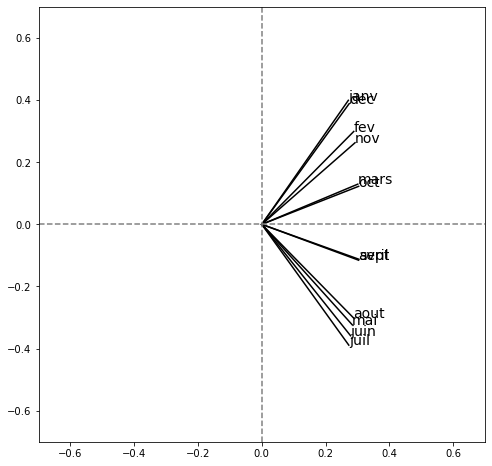

In [12]:
pcs = pca.components_

fig,ax = plt.subplots(figsize=(8,8))

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    ax.plot([0, x], [0, y], color='k')
    # Afficher le mois de l'année
    ax.text(x, y, villes_data.columns[i+1], fontsize='14')

ax.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
ax.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

ax.set_xlim([-0.7, 0.7])
ax.set_ylim([-0.7, 0.7])

On remarque ici que le deuxième axe permet de séparer les mois "chauds" des mois "froids" (partie négative : mois chauds, partie positive : mois froids). Ainsi, **une somme positive implique une forte température relative l'hiver et une faible température l'été. À l'inverse, une somme négative implique une forte température l'été et une faible température l'hiver**. On mesure donc grâce à cet axe l'écart de température entre l'hiver et l'été. Le premier axe lui attribue un poids quasi égal à tous les mois. On comprend ici que cet axe permet de faire **la moyenne des températures de la ville sur l'année**.

Réalisons une visualisation graphique des données projetées dans ces axes.

Text(0, 0.5, "Régularité des températures entre l'hiver et l'été")

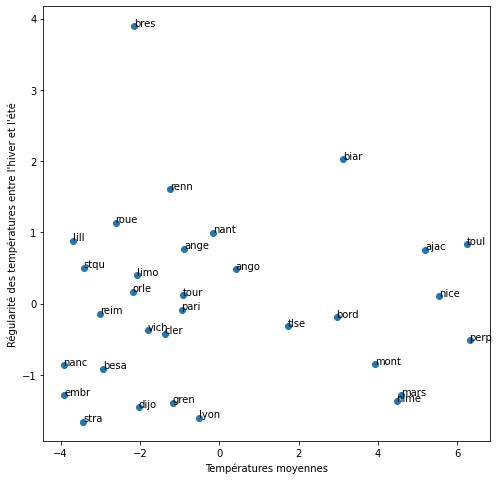

In [13]:
X_pca = pca.transform(X_scaled)

fig,ax = plt.subplots(figsize=(8,8))

ax.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    ax.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 

ax.set_xlabel('Températures moyennes')
ax.set_ylabel("Régularité des températures entre l'hiver et l'été")

On peut réaliser une interprétation ici : 
- tout d'abord on retrouve bien une répartition cohérente selon l'axe 1 : les villes à droite sont en moyenne plus chaudes que les villes de gauche. Par exemple, il fait bien plus chaud en moyenne à Nice qu'à Paris.
- l'axe 1 ne permet pas de différencier les villes de Brest et Dijon car elles ont la même température moyenne sur l'année. En revanche, ces deux villes sont très éloignées sur le deuxième axe. Ceci est dû au fait qu'à Brest il ne fait ni très froid l'hiver, ni très chaud l'été. En revanche, à Dijon il peut faire à la fois très chaud l'été et très froid l'hiver.

### Fichier Crime

In [16]:
crimes_data = pd.read_csv("./crimes.csv",sep=';',header=0)
crimes_data.head()

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [17]:
X = crimes_data.iloc[:, 1:13].values
labels = crimes_data.iloc[:, 0].values

**Normalisation des données**

In [18]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

**ACP**

In [19]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [20]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.58785136 0.17696026]
0.764811620190864


On remarque ici que le premier axe permet d'expliquer 58,8% des données, tandis que l'axe 2 permet d'expliquer 17,7% des données. Ainsi ces deux axes permettent d'expliquer 76,5% des données, ce qui est très inférieur à 90%. Nous allons réaliser une recherche du nombre d'axes nécessaires pour éxpliquer au moins 90% des données

**Recherche du nombre de composantes nécessaires pour expliquer 90% des données.**

Text(0, 0.5, 'pourcentage de variance expliquée')

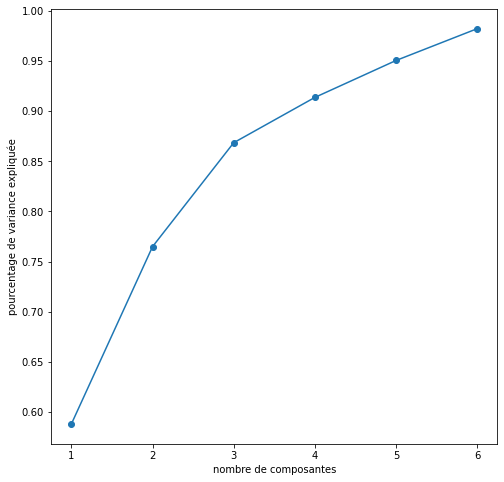

In [21]:
nb_composantes = [n for n in range(1,7)]
variance_expliquee = []

for n in nb_composantes:
    
    pca = decomposition.PCA(n_components=n)
    pca.fit(X_scaled)
    variance_expliquee.append(pca.explained_variance_ratio_.sum())
    
fig, ax = plt.subplots(figsize = (8,8))
ax.plot(nb_composantes,variance_expliquee,'-o')
ax.set_xlabel('nombre de composantes')
ax.set_ylabel('pourcentage de variance expliquée')

Ainsi, afin d'expliquer au moins 90% des données, il faut retenir au moins **4 axes**.

Regardons ce que dit le critère de Kaiser.

In [22]:
Var_X = pd.DataFrame(X_scaled).cov() # obtenir la matrice variance covariance
val_propres,vec_propres = np.linalg.eig(Var_X)
ordre = val_propres.argsort()[::-1]
val_propres = val_propres[ordre]
val_propres

array([4.19893828, 1.26400187, 0.74062921, 0.32288984, 0.26323924,
       0.22657089, 0.12658781])

D'après le critère de Kaiser, il faut retenir les axes dont les valeurs propres sont supérieures à 1. Donc d'après ce critère, on peut retenir les 2 premiers axes.

**Interprétation des deux axes principaux**

(-0.7, 0.7)

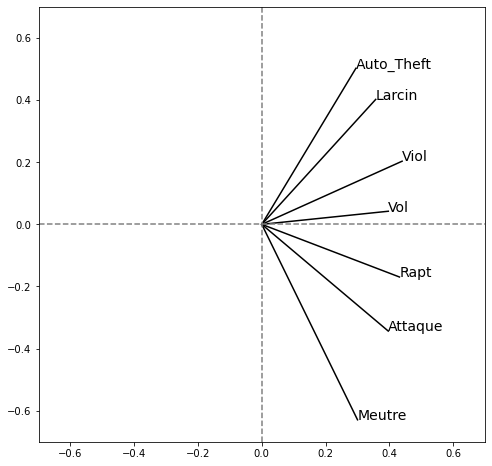

In [23]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)
pcs = pca.components_

fig,ax = plt.subplots(figsize=(8,8))

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    ax.plot([0, x], [0, y], color='k')
    # Afficher le mois de l'année
    ax.text(x, y, crimes_data.columns[i+1], fontsize='14')

ax.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
ax.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

ax.set_xlim([-0.7, 0.7])
ax.set_ylim([-0.7, 0.7])

On constate ici que **le premier axe permet de faire une moyenne du nombre total de crimes**. Le deuxième axe lui permet de **séparer la gravité des crimes** : plus la valeur est négative, plus les crimes commis sont graves, à l'inverse plus la valeur est positive moins le nombre de crimes commis sont graves.

Text(0, 0.5, 'Gravité du crime')

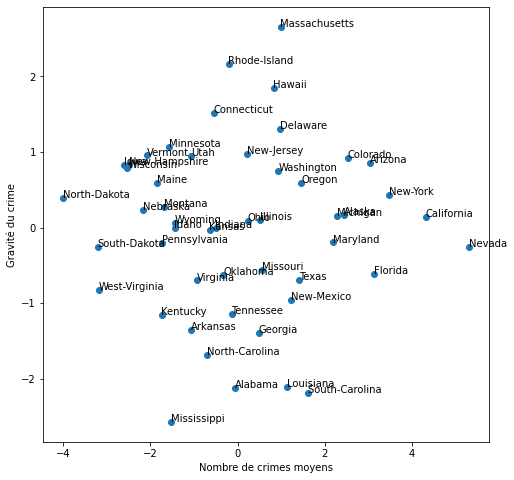

In [24]:
X_pca = pca.transform(X_scaled)

fig,ax = plt.subplots(figsize=(8,8))

ax.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    ax.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 

ax.set_xlabel('Nombre de crimes moyens')
ax.set_ylabel("Gravité du crime")

Interprétons ce graphique :
- Le Névada est l'État dans lequel il y a le plus de crimes commis.
- Le Massachussetts est un État où le nombre de crimes est moyen mais où les crimes sont "moins" graves.
- Le Mississippi quant à lui a un nombre de crimes plutôt faible mais les crimes commis sont plus souvent graves.

### Fichier Startup

In [27]:
startups_data = pd.read_csv("./50_Startups.csv",sep=';',header=0)
startups_data.head()

,Id,Depenses R&D,Depenses Administration,Depenses Marketing Spend,Benefice
0,1,165349.20,136897.80,471784.10,192261.83
1,2,162597.70,151377.59,443898.53,191792.06
2,3,153441.51,101145.55,407934.54,191050.39
3,4,144372.41,118671.85,383199.62,182901.99
4,5,142107.34,91391.77,366168.42,166187.94


In [28]:
X = startups_data.iloc[:, 1:13].values
labels = startups_data.iloc[:, 0].values

**Normalisation des données**

In [29]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

**ACP**

In [30]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.66804393 0.25484695]
0.9228908746506941


On remarque que les deux premiers axes principaux permettent d'expliquer **92% des données**, ce qui est donc suffisant ici puisqu'on souhaite expliquer au moins 90% des données.

**Interprétation des deux axes principaux**

(-1.0, 1.0)

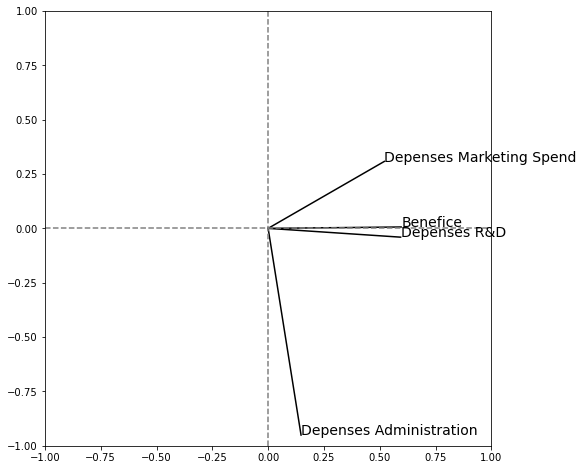

In [31]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)
pcs = pca.components_

fig,ax = plt.subplots(figsize=(8,8))

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    ax.plot([0, x], [0, y], color='k')
    # Afficher le mois de l'année
    ax.text(x, y, startups_data.columns[i+1], fontsize='14')

ax.plot([-1, 1], [0, 0], color='grey', ls='--')
ax.plot([0, 0], [-1, 1], color='grey', ls='--')

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

Dans ce cas, le **premier axe semble réaliser une moyenne des dépenses totales et du bénéfice de la startup** avec un poids moins importants pour les dépenses administratives. En ce qui concerne le deuxième axe, **il permet de différencier les startups qui investissent dans leur administration des entreprises qui investissent dans leur marketing.**

**Visualisation des données**

Text(0, 0.5, "Investissement relatif entre le marketing et l'administratif")

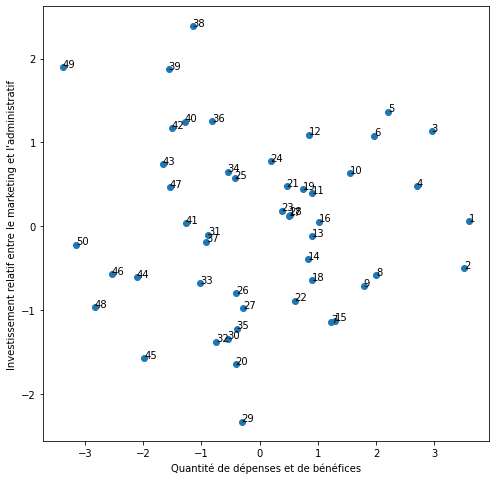

In [32]:
X_pca = pca.transform(X_scaled)

fig,ax = plt.subplots(figsize=(8,8))

ax.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    ax.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 

ax.set_xlabel('Quantité de dépenses et de bénéfices')
ax.set_ylabel("Investissement relatif entre le marketing et l'administratif")

Interprétons ce graphique :
- Les startups 1 et 2 sont les startups qui ont la plus grosse somme investissements + bénéfices. Malheureusement, cette ACP ne nous permet pas de savoir ce qui intervient le plus dans cette somme entre un fort bénéfice et un fort investissement R§D.
- L'entreprise 38 est celle qui investit le plus dans le marketing tandis que l'entreprise 29 est celle qui investit le plus dans l'administration.
- Si on regarde la répartition globale, il semblerait que plus on investit dans le marketing, plus la somme investissements + bénéfices est forte. Donc il semble plus judicieux d'investir dans le marketing.

## Clustering
---------

On réutilise le jeu de données constitué des températures des 12 mois de l'année pour 32 villes en France.

In [14]:
X = villes_data.iloc[:, 1:13].values
labels = villes_data.iloc[:, 0].values

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

X_pca = pca.transform(X_scaled)

### KMeans

On réalise le clustering de ces données avec la bibilothèque sklearn pour obtenir 3 clusters.

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(X)
clustering_kmeans = kmeans.labels_

On visualise dans le plan principal le clustering ainsi réalisé.

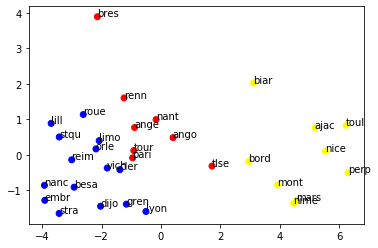

In [23]:
import matplotlib
import matplotlib.pyplot as plt

colors = ['red','yellow','blue']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering_kmeans, cmap=matplotlib.colors.ListedColormap(colors)) 
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 
plt.show()

On observe ainsi les 3 clusters. Si le cluster à droite semble bien isolé, les deux autres clusters semblent trop proches pour être bien séparés.

### AgglomerativeClustering : méthode ward

La méthode ward consiste à minimiser la variance au sein d'un cluster.

In [19]:
from sklearn.cluster import AgglomerativeClustering

AC_ward = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
clustering_ward = AC_ward.labels_

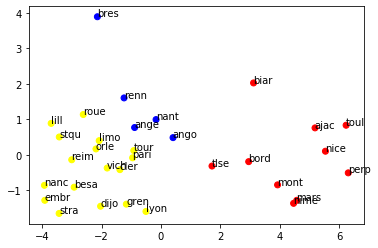

In [20]:
import matplotlib
import matplotlib.pyplot as plt

colors = ['red','yellow','blue']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering_ward, cmap=matplotlib.colors.ListedColormap(colors)) 
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 
plt.show()

On observe ainsi les 3 clusters. Si le cluster à droite semble bien isolé, les deux autres clusters semblent toujours trop proches pour être bien séparés.

### AgglomerativeClustering : méthode average

La méthode average utilise la moyenne des distances entre chaque observation d'un cluster.

In [21]:
from sklearn.cluster import AgglomerativeClustering

AC_average = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)
clustering_average = AC_average.labels_

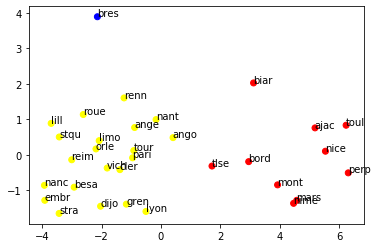

In [22]:
import matplotlib
import matplotlib.pyplot as plt

colors = ['red','yellow','blue']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering_average, cmap=matplotlib.colors.ListedColormap(colors)) 
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 
plt.show()

On observe ainsi les 3 clusters. Cette fois les clusters de droite et de gauche sont bien distincts, et le troisième cluster est bien isolé. En revanche ce dernier n'est constitué que d'une seule ville.

### Meilleure partition pour KMeans

Le score Silhouette permet d'évaluer la qualité d'un clustering donné. Il évolue entre -1 et 1. Plus il est proche de 1, meilleur est le clustering.

In [24]:
from sklearn.cluster import KMeans
from sklearn import metrics

scores=[]
for i in np.arange(2, 6):
    clustering = KMeans(n_clusters=i).fit_predict(X) 
    score = metrics.silhouette_score(X, clustering, metric='euclidean')
    scores.append(score)
print(scores)

[0.6181156437258204, 0.40912000832289414, 0.3607157286251509, 0.33116954226736833]


Le score maximale est obtenu pour une partition de 2 clusters. En effet on observe correctement 2 clusters, et le troisième n'est constitué que d'une seule ville. En termes de score de clustering cela signifie que 2 clusters sont mieux notés que trois. Toutefois ce n'est pas la meilleur description des données. **En effet il faut bien tenir compte de cette donnée qui sort de l'ordinaire, en la retirant, ou en la comptant comme un autre cluster.**

### Meilleur algorithme pour obtenir 3 clusters

In [25]:
from sklearn import metrics

score_kmeans_3clusters = metrics.silhouette_score(X, clustering_kmeans, metric='euclidean')
score_ward_3clusters = metrics.silhouette_score(X, clustering_ward, metric='euclidean')
score_average_3clusters = metrics.silhouette_score(X, clustering_average, metric='euclidean')

print(score_kmeans_3clusters, score_ward_3clusters, score_average_3clusters)

0.40912000832289414 0.40631332038912676 0.4917281366704161


Avec une partition de 3 clusters, l'algorithme qui obtient le meilleur score Silhouette est la méthode average de AgglomerativeClustering. En effet on obtient deux groupes bien distincts et équilibrés, et un troisième constitué d'une seule ville qui se distingue vraiment du reste.